In [1]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/uciml/mushroom-classification')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  chandrashekharbasu


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/uciml/mushroom-classification


100%|██████████| 34.2k/34.2k [00:00<00:00, 194kB/s]

In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
data_set = pd.read_csv('mushroom-classification/mushrooms.csv')
data_set

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [8]:
data_set.dropna(inplace = True)
data_set

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [10]:
device = 'cpu'
x_df = data_set.drop(['class'], axis = 1)
x_df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [11]:
y_df = data_set['class']
y_df

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [16]:
x_df_e = pd.get_dummies(x_df)
x_df_e

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
8121,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,True,False,False,False,False


In [17]:
y_df_e = pd.get_dummies(y_df)
y_df_e

,e,p
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False
...,...,...
8119,True,False
8120,True,False
8121,True,False
8122,False,True


In [18]:
x_df_e.dtypes

cap-shape_b    bool
cap-shape_c    bool
cap-shape_f    bool
cap-shape_k    bool
cap-shape_s    bool
               ... 
habitat_l      bool
habitat_m      bool
habitat_p      bool
habitat_u      bool
habitat_w      bool
Length: 117, dtype: object

In [19]:
X = np.array(x_df_e)
X

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [20]:
Y = np.array(y_df_e)
Y

array([[False,  True],
       [ True, False],
       [ True, False],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [26]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size = 0.3)
print(X_Train.shape)
print(Y_Train.shape)
print(X_Test.shape)
print(Y_Test.shape)

(5686, 117)
(5686, 2)
(2438, 117)
(2438, 2)


In [27]:
class dataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.tensor(X, dtype = torch.float32).to(device)
        self.Y = torch.tensor(Y, dtype = torch.float32).to(device)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.Y[index]

In [36]:
train_dataset = dataset(X_Train, Y_Train)
train_dataset.X.shape

torch.Size([5686, 117])

In [37]:
test_dataset = dataset(X_Test, Y_Test)
test_dataset.X.shape

torch.Size([2438, 117])

In [39]:
BATCH_SIZE = 32
training_dataloader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True)
test_dataloader = DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle = True)

In [53]:

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel,self).__init__()

        self.input_layer = nn.Linear(X_Train.shape[1],30)
        self.hidden_1 = nn.Linear(30,30)
        self.sigmoid_1 = nn.Sigmoid()
        self.hidden_2 = nn.Linear(30,2)
        self.sigmoid_2 = nn.Sigmoid()
    def forward(self,x):
        x = self.input_layer(x)
        x = self.hidden_1(x)
        x = self.sigmoid_1(x)
        x = self.hidden_2(x)
        x = self.sigmoid_2(x)
        return x

model = MyModel().to(device)

In [54]:
model

MyModel(
  (input_layer): Linear(in_features=117, out_features=30, bias=True)
  (hidden_1): Linear(in_features=30, out_features=30, bias=True)
  (sigmoid_1): Sigmoid()
  (hidden_2): Linear(in_features=30, out_features=2, bias=True)
  (sigmoid_2): Sigmoid()
)

In [55]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr = 1e-3)

In [56]:
EPOCHS = 30
train_loss_plot = []
test_loss_plot = []
for epoch in range(EPOCHS):
    train_loss_cum = 0
    test_loss_cum = 0
    for data in training_dataloader:
        inputs, label = data
        predictions = model(inputs)
        loss = criterion(predictions, label)#mental note, citerion returns a loss object whcih wraps waound loss
        train_loss_cum += loss.item()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    with torch.no_grad():
        for data in test_dataloader:
            inputs, label = data
            predictions = model(inputs)
            loss = criterion(predictions, label)#mental note, citerion returns a loss object whcih wraps waound loss
            test_loss_cum += loss.item()
            
        
    train_loss_plot.append(train_loss_cum)
    test_loss_plot.append(test_loss_cum)
    print("LOSS FOR THIS EPOCH IS = "+ str(train_loss_cum))
    print("========================")
        

LOSS FOR THIS EPOCH IS = 68.82422189414501
LOSS FOR THIS EPOCH IS = 11.99702027067542
LOSS FOR THIS EPOCH IS = 4.264275828376412
LOSS FOR THIS EPOCH IS = 2.2599841598421335
LOSS FOR THIS EPOCH IS = 1.4295868943445385
LOSS FOR THIS EPOCH IS = 1.0003428617492318
LOSS FOR THIS EPOCH IS = 0.7416870542801917
LOSS FOR THIS EPOCH IS = 0.5762862814590335
LOSS FOR THIS EPOCH IS = 0.4594188753981143
LOSS FOR THIS EPOCH IS = 0.3750567667884752
LOSS FOR THIS EPOCH IS = 0.31103088543750346
LOSS FOR THIS EPOCH IS = 0.2616563303163275
LOSS FOR THIS EPOCH IS = 0.22244002862134948
LOSS FOR THIS EPOCH IS = 0.19097608199808747
LOSS FOR THIS EPOCH IS = 0.1652074494631961
LOSS FOR THIS EPOCH IS = 0.14395896886708215
LOSS FOR THIS EPOCH IS = 0.12595285184215754
LOSS FOR THIS EPOCH IS = 0.11084451276110485
LOSS FOR THIS EPOCH IS = 0.09793244919274002
LOSS FOR THIS EPOCH IS = 0.08686384509201162
LOSS FOR THIS EPOCH IS = 0.07730035649728961
LOSS FOR THIS EPOCH IS = 0.06896298902574927
LOSS FOR THIS EPOCH IS = 

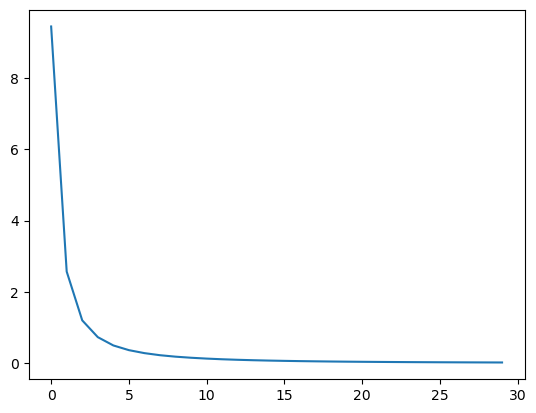

In [58]:
plt.plot(test_loss_plot)
plt.show()